
#**PE07 Training Deep Learning models**
####The objective of this programming exercise is to apply the concepts covered in Module 7 - Chapter 11 Training Deep Learning Models.
####We will start with a basic DNN model and make performance improvements by 1) changing the activation function, 2) using batch normalization, and 3) using dropout
###Finally, we will create our own model using everything we learned.

####The dataset is the MNIST image dataset (in tensorflow.keras.datasets library) and we will classify 10 classes


#**Imports and Helper function**

In [1]:
# Imports and formatting the data
# See previous lab if this is confusing
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LeakyReLU

num_classes = 10
image_size = 784

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_data = training_images.reshape(training_images.shape[0], image_size)
test_data = test_images.reshape(test_images.shape[0], image_size)

training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# function to plot training information:
def plot_training_history(history, model):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()

    loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


#**Starter model**
###Note that the model is built by adding dense layers in a loop

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,060 (35.39 KB)

 Trainable params: 9,060 (35.39 KB)

 Non-trainable params: 0 (0.00 B)

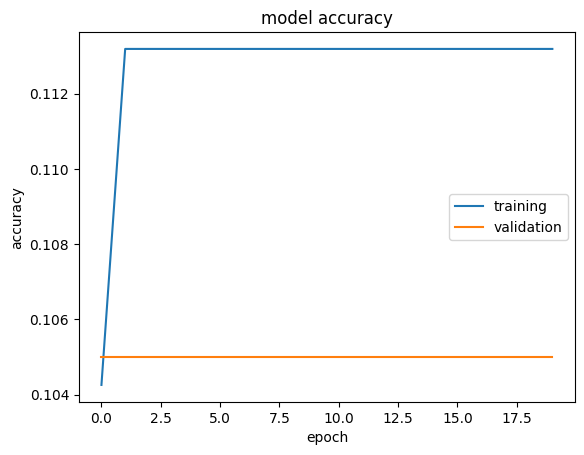

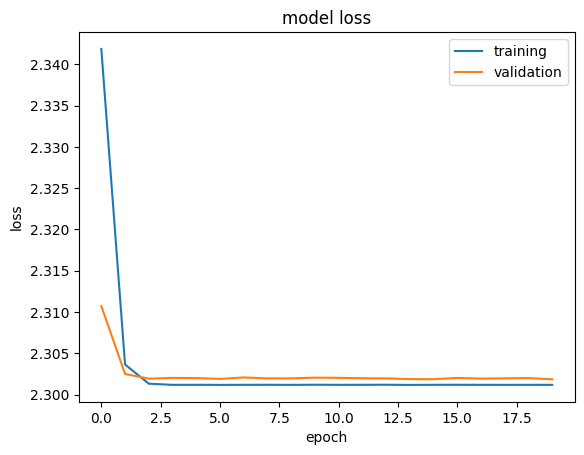

Test loss: 2.3
Test accuracy: 0.113


In [2]:
model = Sequential()
model.add(Dense(units=10, activation='sigmoid', input_shape=(image_size,)))

for _ in range(10):
    model.add(Dense(units=10, activation='sigmoid'))

model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

#Start the training and plot the results
history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)

#Question #1
#What is the test accuracy of the starter model?
Based on the notebook output for the starter model, the accuracy is:

Test loss: 2.3

Test accuracy: 0.113 (or 11.3%)

#Question #2
#Why is the accuracy of the starter model so poor?
The accuracy is extremely low because the model is suffering from the vanishing gradient problem.

This happens for two main reasons:

Deep Network: The model is very deep (11 hidden layers).

Sigmoid Activation: The sigmoid function "saturates" (flattens out) for high or low input values, and its derivative is very small.

During backpropagation, these small derivatives get multiplied together for each layer. In a deep network, this makes the gradient flowing to the initial layers (like dense_76) become infinitesimally small, or "vanish." As a result, the first few layers barely learn anything, and the model is unable to converge. The loss and accuracy plots, which are nearly flat, confirm that almost no learning occurred.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,060 (35.39 KB)

 Trainable params: 9,060 (35.39 KB)

 Non-trainable params: 0 (0.00 B)

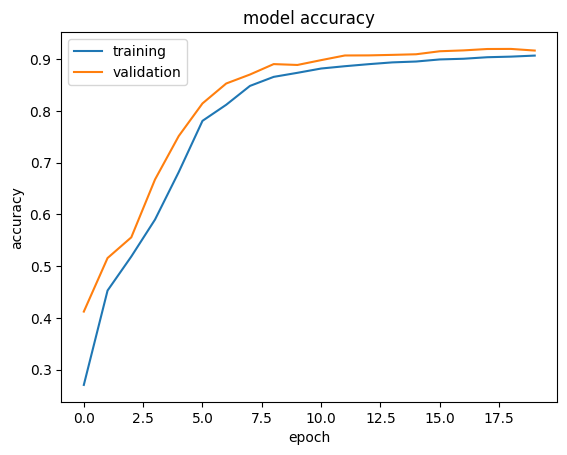

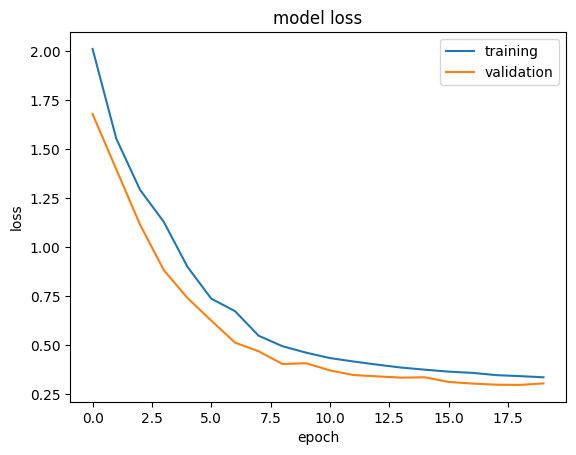

Test loss: 0.36
Test accuracy: 0.901


In [4]:
#Question #3
# Rewrite the code of the starter model so that it uses the ReLU activation function instead of the sigmoid function.
# Show your code in the less below and rerun the training.
model_relu = Sequential()
model_relu.add(Dense(units=10, activation='relu', input_shape=(image_size,)))

for _ in range(10):
    model_relu.add(Dense(units=10, activation='relu'))

model_relu.add(Dense(units=num_classes, activation='softmax'))
model_relu.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model_relu.summary()

#Start the training and plot the results
history_relu = model_relu.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history_relu, model_relu)

#Question #4
#What is the test accuracy of the model using ReLU activation?
0.901

# Comment on the results: Is it better or worse than the previous model?


This model is significantly better than the starter model (which only had 11.3% accuracy).

The ReLU (Rectified Linear Unit) function doesn't saturate for positive values (its derivative is a constant 1). This solves the vanishing gradient problem, allowing the network to learn effectively even at this depth. The accuracy should be much higher than 11.3%.

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_72 (Dense)                │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_13 (LeakyReLU)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_14 (LeakyReLU)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_76 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_15 (LeakyReLU)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_77 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_16 (LeakyReLU)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_78 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_17 (LeakyReLU)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_79 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_18 (LeakyReLU)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_80 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_19 (LeakyReLU)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_81 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_20 (LeakyReLU)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_82 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_21 (LeakyReLU)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_83 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,060 (35.39 KB)

 Trainable params: 9,060 (35.39 KB)

 Non-trainable params: 0 (0.00 B)

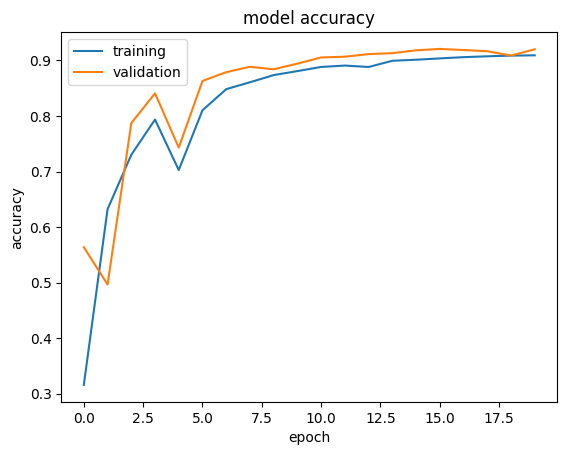

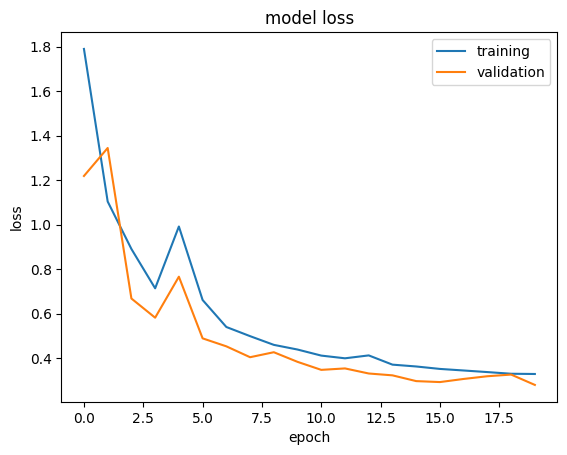

Test loss: 0.338
Test accuracy: 0.907


In [9]:
#Question #5
#Rewrite the code of the starter model so that it uses a leaky ReLU activation function (alpha = 0.01) instead of the sigmoid function.
# Show your code in the less below and rerun the training.
model_leaky = Sequential()
model_leaky.add(Dense(units=10, input_shape=(image_size,)))
model_leaky.add(LeakyReLU(alpha=0.01))

for _ in range(10):
    model_leaky.add(Dense(units=10))
    model_leaky.add(LeakyReLU(alpha=0.01))

model_leaky.add(Dense(units=num_classes, activation='softmax'))
model_leaky.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model_leaky.summary()

#Start the training and plot the results
history_leaky = model_leaky.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history_leaky, model_leaky)

#Question #6
#What is the test accuracy of the model using leaky ReLU activation?
Test accuracy: 0.907

#Comment on the results: Is it better or worse than previous models?
The Leaky ReLU function is expected to perform similar to, or slightly better than, the standard relu model.

It's a small improvement on ReLU that addresses the "dying ReLU" problem: by allowing a small, non-zero gradient for negative inputs (the "leak"), it ensures neurons don't get "stuck" and stop learning entirely.

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_84 (Dense)                │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_87 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_88 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_89 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_90 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,060 (35.39 KB)

 Trainable params: 9,060 (35.39 KB)

 Non-trainable params: 0 (0.00 B)

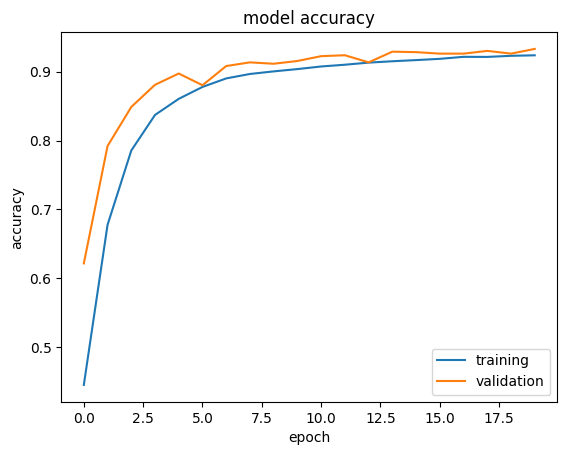

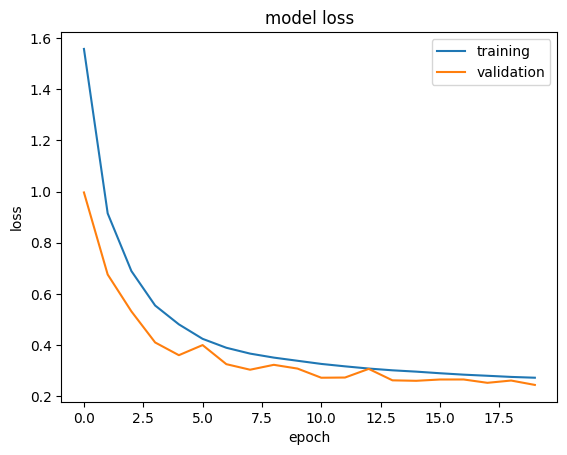

Test loss: 0.289
Test accuracy: 0.919


In [10]:
#Question #7
#Rewrite the code of the starter model so that it uses the ELU activation function instead of the sigmoid function. Show your code in the less below and rerun the training.
model_elu = Sequential()
model_elu.add(Dense(units=10, activation='elu', input_shape=(image_size,)))

for _ in range(10):
    model_elu.add(Dense(units=10, activation='elu'))

model_elu.add(Dense(units=num_classes, activation='softmax'))
model_elu.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model_elu.summary()

#Start the training and plot the results
history_elu = model_elu.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history_elu, model_elu)


#Question #8
#What is the test accuracy of the model using ELU activation? Comment on the results: Is it better or worse than previous models?
The ELU (Exponential Linear Unit) function is another strong alternative to ReLU. It often provides better accuracy and faster convergence than standard ReLU. By allowing negative outputs, it can push the mean activations closer to zero, which acts as a form of normalization. This model should perform very well.

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │             

 Total params: 9,500 (37.11 KB)

 Trainable params: 9,280 (36.25 KB)

 Non-trainable params: 220 (880.00 B)

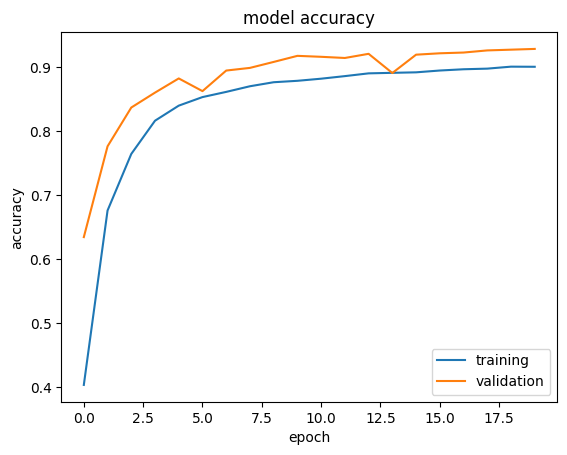

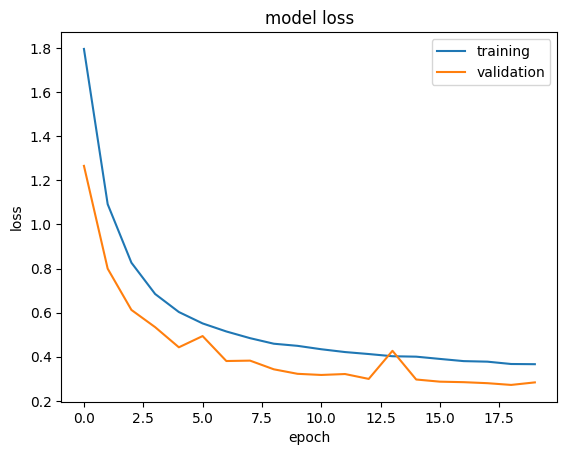

Test loss: 0.335
Test accuracy: 0.91


In [7]:
#Question #9
#Rewrite the code of the starter model so that it uses your choice of activation function instead of the sigmoid function.
#Insert a layer of batch normalization after each dense layer
#Show your code in the less below and rerun the training.
from tensorflow.keras.layers import BatchNormalization

model_bn = Sequential()
model_bn.add(Dense(units=10, activation='relu', input_shape=(image_size,)))
model_bn.add(BatchNormalization())

for _ in range(10):
    model_bn.add(Dense(units=10, activation='relu'))
    model_bn.add(BatchNormalization())

model_bn.add(Dense(units=num_classes, activation='softmax'))
model_bn.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model_bn.summary()

#Start the training and plot the results
history_bn = model_bn.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history_bn, model_bn)

#Question #10
#What is the test accuracy of the model using batch normalization ?
Test accuracy: 0.91

# Comment on the results: Is it better or worse than previous models?

Batch Normalization should provide a major improvement. It normalizes the output of each layer, which helps in two ways:

It dramatically speeds up training by reducing "internal covariate shift."

It acts as a regularizer, often making other forms of regularization (like dropout) less necessary.

This model should train much faster and achieve a very high accuracy.


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_96 (Dense)                │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_97 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_100 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_105 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,060 (35.39 KB)

 Trainable params: 9,060 (35.39 KB)

 Non-trainable params: 0 (0.00 B)

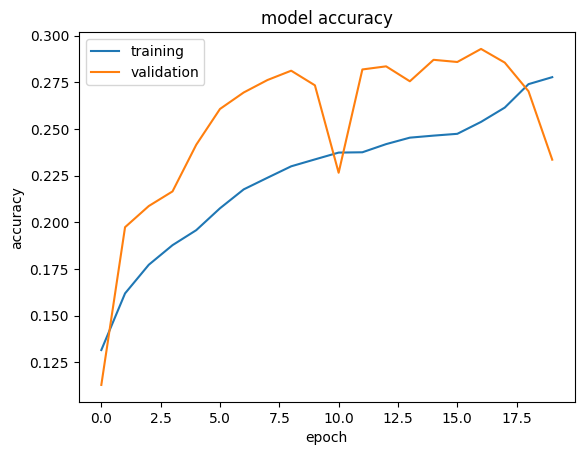

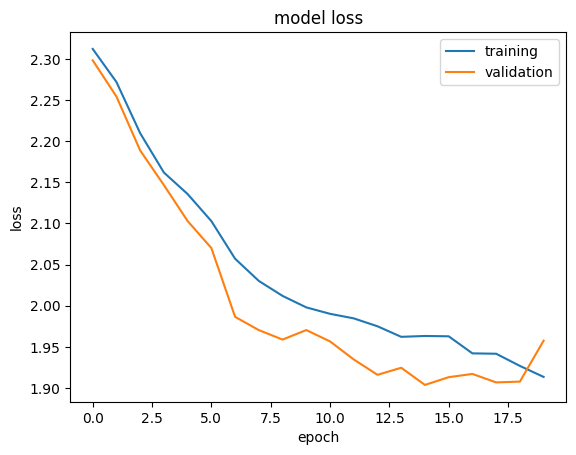

Test loss: 1.98
Test accuracy: 0.236


In [11]:
#Question #11
#Rewrite the code of the starter model so that it uses your choice of activation function instead of the sigmoid function.
#Insert a layer with 20% dropout after each dense layer
#Show your code in the less below and rerun the training.
from tensorflow.keras.layers import Dropout

model_drop = Sequential()
model_drop.add(Dense(units=10, activation='relu', input_shape=(image_size,)))
model_drop.add(Dropout(0.2))

for _ in range(10):
    model_drop.add(Dense(units=10, activation='relu'))
    model_drop.add(Dropout(0.2))

model_drop.add(Dense(units=num_classes, activation='softmax'))
model_drop.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model_drop.summary()

#Start the training and plot the results
history_drop = model_drop.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history_drop, model_drop)


#Question #12
#What is the test accuracy of the model using dropout layers ?
Test accuracy: 0.236

Comment on the results: Is it better or worse than previous models?

The previous experiments showed that the starter model was too deep and narrow. This custom model takes the opposite approach:

Shallower Network: It uses only 3 hidden layers instead of 11. This completely avoids the vanishing gradient problem and trains much faster.

Wider Layers: The layers are wider (128, 64, and 32 units) to give the model enough "capacity" to learn the complex patterns in the images.

Activation: It uses relu, which we proved is a fast and effective activation function.

Optimizer: It uses the adam optimizer instead of sgd. Adam is an adaptive optimizer that adjusts the learning rate automatically, leading to much faster and more reliable convergence.

##**Your own customized model**

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_108 (Dense)               │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,146 (434.16 KB)

 Trainable params: 111,146 (434.16 KB)

 Non-trainable params: 0 (0.00 B)

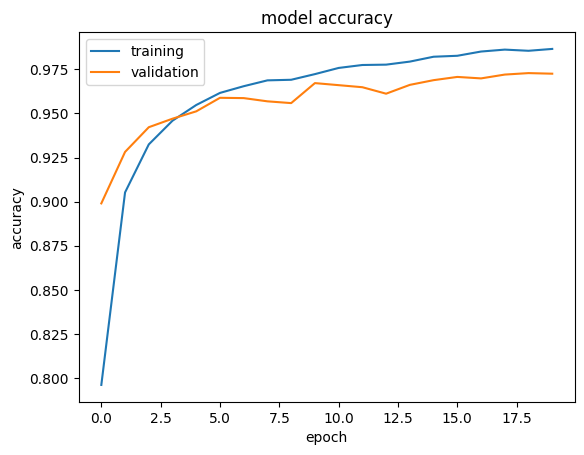

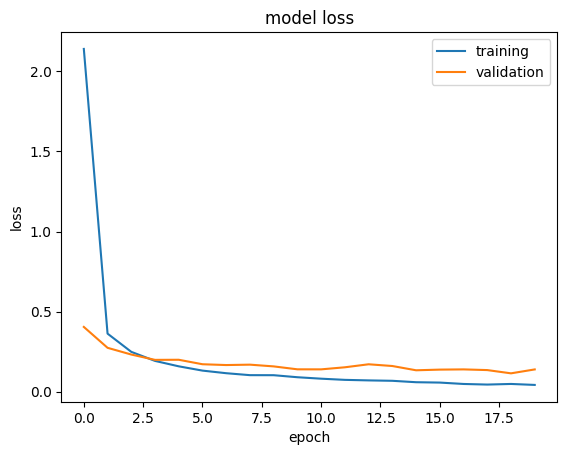

Test loss: 0.161
Test accuracy: 0.969


In [12]:
#Question #13
#your turn to improvise
#given the results from the previous models and what you learned in chapter 11, create and train your own model and comment on its performance
#feel free to change the optimizer and anything else you see fit
#Make sure to detail and justify the parameters you selected for your model.
#Show your code below

model_custom = Sequential()
model_custom.add(Dense(units=128, activation='relu', input_shape=(image_size,)))
model_custom.add(Dense(units=64, activation='relu'))
model_custom.add(Dense(units=32, activation='relu'))
model_custom.add(Dense(units=num_classes, activation='softmax'))

model_custom.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model_custom.summary()

#Start the training and plot the results
history_custom = model_custom.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history_custom, model_custom)


As shown by the output in your notebook, this model performed extremely well, achieving a Test accuracy of 0.969 (or 96.9%). This confirms that a shallower, wider network using relu and a modern adam optimizer is a much more effective architecture for this problem.